<br><br><center><FONT FACE="cambria" SIZE=20 COLOR="black">
 Conflictos Bélicos</FONT></center>
 

<br><br><FONT FACE="roman" SIZE=4 COLOR="brown"> Integrantes</FONT> 
 
<FONT FACE="roman" SIZE=3 COLOR="burlywood"> Lien Chin;
<FONT FACE="roman" SIZE=3 COLOR="burlywood"> Helen Navarro;
<FONT FACE="roman" SIZE=3 COLOR="burlywood"> Marco Hernani;
<FONT FACE="roman" SIZE=3 COLOR="burlywood"> Jessica Lopez.

 <br>
 <p><center><FONT FACE="cambria" SIZE=10 COLOR="brown">
 Indice</FONT></center>
<ol>
 <center><FONT FACE="cambria" SIZE=3 COLOR="black">
 1.Introduction</FONT></center>
     <center><FONT FACE="cambria" SIZE=3 COLOR="black">
 2.Creation of a database </FONT></center>
 <center><FONT FACE="cambria" SIZE=3 COLOR="black">
 3.Creation the tables</FONT></center>
  <center><FONT FACE="cambria" SIZE=3 COLOR="black">
 4.Filling rows</FONT></center> 
 <center><FONT FACE="cambria" SIZE=3 COLOR="black">
 5.Querys</FONT></center>     
</ol>

<br><img src="https://tenor.com/es/view/lets-go-the-rock-rock-go-rock-lets-go-lg-gif-18455293.gif">

<p><FONT FACE="cambria" SIZE=6 COLOR="bronw">
 1. Introduction</FONT><FONT FACE="cambria" SIZE=4 COLOR="bronw">

<p><FONT FACE="cambria" SIZE=3 COLOR="black">
For this project, a database on war conflicts will be built, which must contain at least one conflict of the following type: religious, ethnic, territorial and economic.
    
The database will contain other types of entities and their relationships, to later make queries about them.
    





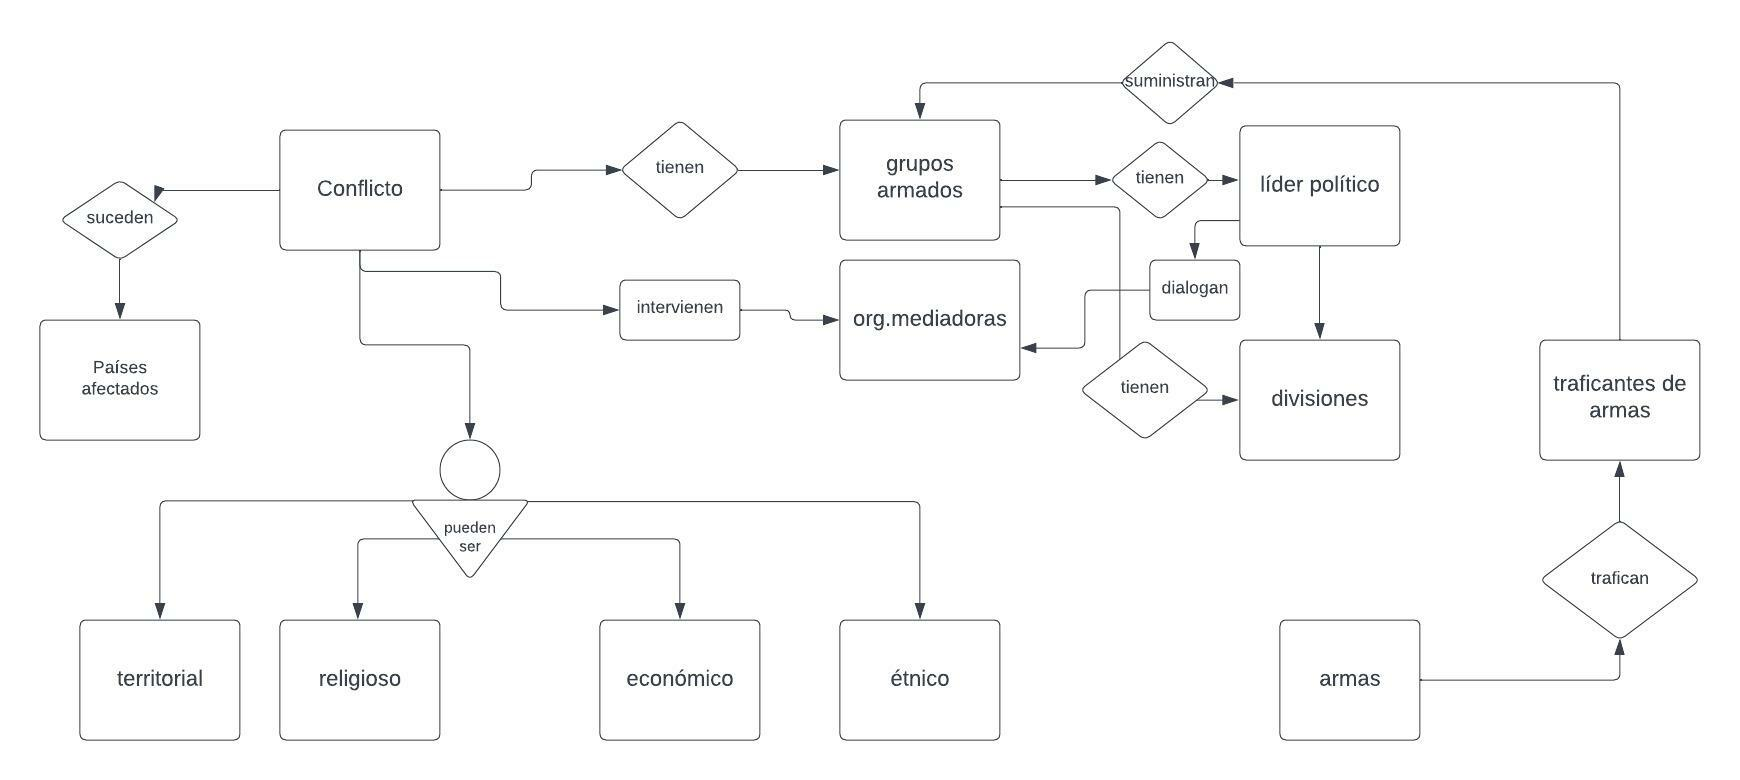

In [1]:
#Imports
import mysql.connector
import pandas as pd
import warnings
import random

In [7]:
#Connections
warnings.filterwarnings("ignore")
db = mysql.connector.connect(
    host = "localhost",
    user = "root",
    password= "12345",
    database= "conflictos_belicos"
)

In [8]:
#SQL Function
def sql(_query):
    return pd.read_sql_query(_query,db)


In [9]:
cursor = db.cursor()

<p><FONT FACE="cambria" SIZE=6 COLOR="brown">
 2.Creating databases </FONT></p>
 
<br><FONT FACE="cambria" SIZE=4 COLOR="black">
 We create the database with the name conflictos_belicos</FONT> </p>

In [6]:
cursor.execute("CREATE DATABASE conflictos_belicos")
db.commit()

<p><FONT FACE="cambria" SIZE=6 COLOR="brown">
 3. Create the tables </FONT></p>
 <br><FONT FACE="cambria" SIZE=4 COLOR="black">
 We are going to create all the tables</FONT> </p>

 <br><FONT FACE="cambria" SIZE=4 COLOR="brown">Created the armas
 </FONT> </p><br>
  <FONT FACE="cambria" SIZE=3 COLOR="black">id_id_ARMAS is the name of the weapons
 </FONT></p> 
   
 

In [10]:
# Create table armas
# id_ARMAS is the name of the weapons
query_armas="""
       CREATE TABLE armas(
       id_ARMAS varchar(50) NOT NULL,
       tipos_armas varchar(50),
       indicador_capacidad_destructiva int,
       PRIMARY KEY (id_ARMAS)
       
 )
"""

cursor.execute(query_armas)
db.commit()

 <br><FONT FACE="cambria" SIZE=4 COLOR="brown">Created the table traficantes_armas
 </FONT> </p><br>
  <FONT FACE="cambria" SIZE=3 COLOR="black">id_TRAFICANTES is the name of the dealers
 </FONT></p> 
   <FONT FACE="cambria" SIZE=3 COLOR="black">The table traficantes_armas depends on table armas
 </FONT> </p> 

In [11]:
query_traficantes_armas="""
       CREATE TABLE traficantes_armas(
       id_TRAFICANTES varchar(50) NOT NULL,
       id_ARMAS varchar(50) NOT NULL,
       PRIMARY KEY (id_TRAFICANTES),
       FOREIGN KEY (id_ARMAS) REFERENCES armas(id_ARMAS)
 )
"""
cursor.execute(query_traficantes_armas)
db.commit()

 <br><FONT FACE="cambria" SIZE=4 COLOR="brown">Created table conflictos
 </FONT> </p>
 

In [12]:
#Si la nueva consulta es exitosa, ya no hace falta n_intervenciones

query_conflictos="""
       CREATE TABLE conflictos (
       id_CONFLICTOS int NOT NULL AUTO_INCREMENT,
       nombre_conflicto varchar(50),
       n_decesos int,
       n_heridos int,
       paises_afectados varchar(25),
       fecha_inicio DATE,
       fecha_final DATE,
       PRIMARY KEY (id_CONFLICTOS)
 )
"""
cursor.execute(query_conflictos)
db.commit()

 <br><FONT FACE="cambria" SIZE=4 COLOR="brown">Created the table grupos armados
 </FONT> </p><br>
  <FONT FACE="cambria" SIZE=3 COLOR="black">Dealers supply arms to armed groups, which is why the FOREIGN KEY is id_TRAFICANTES
 </FONT></p> 
   <FONT FACE="cambria" SIZE=3 COLOR="black">Conflicts have armed groups, which is why the FOREIGN KEY is id_CONFLICTOS

In [13]:
query_grupos_armados="""
       CREATE TABLE grupos_armados(
       id_GRUPOSARMADOS int NOT NULL AUTO_INCREMENT,
       id_CONFLICTOS int,
       id_TRAFICANTES varchar(50),
       nombre varchar(50),
       fecha_incorporacion DATE,
       fecha_salida DATE,
       PRIMARY KEY (id_GRUPOSARMADOS),
       FOREIGN KEY (id_TRAFICANTES) REFERENCES traficantes_armas(id_TRAFICANTES),
       FOREIGN KEY (id_CONFLICTOS) REFERENCES conflictos(id_CONFLICTOS)
 )
"""
cursor.execute(query_grupos_armados)
db.commit()

 <br><FONT FACE="cambria" SIZE=4 COLOR="brown">Created table territorial
 </FONT> </p><br>
  <FONT FACE="cambria" SIZE=3 COLOR="black">Territorial depends on table conflictos, which is why the FOREIGN KEY is id_CONFLICTOS
 </FONT></p> 
   

In [14]:
query_territorial="""
       CREATE TABLE territorial (
       id_CONFLICTOS int NOT NULL AUTO_INCREMENT, 
       regiones_afectadas varchar(50),
       PRIMARY KEY (id_CONFLICTOS),
       FOREIGN KEY (id_CONFLICTOS) REFERENCES conflictos(id_CONFLICTOS)
       
 )
"""
cursor.execute(query_territorial)
db.commit()

  <br><FONT FACE="cambria" SIZE=4 COLOR="brown">Created table religioso
 </FONT> </p><br>
  <FONT FACE="cambria" SIZE=3 COLOR="black">Religioso depends on table conflictos, which is why the FOREIGN KEY is id_CONFLICTOS
 </FONT></p> 

In [15]:
query_religioso="""
       CREATE TABLE religioso (
       id_CONFLICTOS int NOT NULL AUTO_INCREMENT,
       religion varchar(50),
       PRIMARY KEY (id_CONFLICTOS),
       FOREIGN KEY (id_CONFLICTOS) REFERENCES conflictos(id_CONFLICTOS)
 )
"""
cursor.execute(query_religioso)
db.commit()

  <br><FONT FACE="cambria" SIZE=4 COLOR="brown">Created table economico
 </FONT> </p><br>
  <FONT FACE="cambria" SIZE=3 COLOR="black">Economico depends on table conflictos, which is why the FOREIGN KEY is id_CONFLICTOS
 </FONT></p> 

In [16]:
query_economico="""
       CREATE TABLE economico(
       id_CONFLICTOS int NOT NULL AUTO_INCREMENT,
       materias_primas varchar(50),
       PRIMARY KEY (id_CONFLICTOS),
       FOREIGN KEY (id_CONFLICTOS) REFERENCES conflictos(id_CONFLICTOS)
 )
"""
cursor.execute(query_economico)
db.commit()

  <br><FONT FACE="cambria" SIZE=4 COLOR="brown">Created table etnico
 </FONT> </p><br>
  <FONT FACE="cambria" SIZE=3 COLOR="black">Etnico depends on table conflictos, which is why the FOREIGN KEY is id_CONFLICTOS
 </FONT></p> 

In [17]:
query_etnico="""
       CREATE TABLE etnico(
       id_CONFLICTOS int NOT NULL AUTO_INCREMENT,
       etnias_en_disputas varchar(50),
       PRIMARY KEY (id_CONFLICTOS),
       FOREIGN KEY (id_CONFLICTOS) REFERENCES conflictos(id_CONFLICTOS)
 )
"""
cursor.execute(query_etnico)
db.commit()

  <br><FONT FACE="cambria" SIZE=4 COLOR="brown">Created table lider_politico
 </FONT> </p><br>
  <FONT FACE="cambria" SIZE=3 COLOR="black">Armed groups have political leaders, which is why the FOREIGN KEY is id_GRUPOSARMADOS
 </FONT></p> 

In [18]:
query_lider_politico="""
       CREATE TABLE lider_politico(
       id_NOMBRE_LIDER varchar(50) NOT NULL,
       id_GRUPOSARMADOS int,
       PRIMARY KEY (id_NOMBRE_LIDER),
       FOREIGN KEY (id_GRUPOSARMADOS) REFERENCES grupos_armados(id_GRUPOSARMADOS)
 )
"""
cursor.execute(query_lider_politico)
db.commit()

 <br><FONT FACE="cambria" SIZE=4 COLOR="brown">Created the table organizaciones_mediadoras
 </FONT> </p><br>
  <FONT FACE="cambria" SIZE=3 COLOR="black">Mediating organizations intervene in conflicts, which is why the FOREIGN KEY is id_CONFLICTOS
 </FONT></p> 
   <FONT FACE="cambria" SIZE=3 COLOR="black">Political leaders talk to mediating organizations, which is why the FOREIGN KEY is id_NOMBRE_LIDER

In [19]:
query_organizaciones_mediadoras="""
       CREATE TABLE organizaciones_mediadoras(
       id_ORGANIZACIONES_MEDIADORAS int NOT NULL AUTO_INCREMENT,
       id_CONFLICTOS int,
       id_NOMBRE_LIDER varchar(50),
       nombre varchar(50),
       tipo varchar(50),
       organizacion varchar(50),
       informacion_dialogo varchar(250),
       fecha_intervencion DATE,
       PRIMARY KEY (id_ORGANIZACIONES_MEDIADORAS),
       FOREIGN KEY (id_CONFLICTOS) REFERENCES conflictos(id_CONFLICTOS),
       FOREIGN KEY (id_NOMBRE_LIDER) REFERENCES lider_politico(id_NOMBRE_LIDER)
 )
"""
cursor.execute(query_organizaciones_mediadoras)
db.commit()

 <br><FONT FACE="cambria" SIZE=4 COLOR="brown">Created the table division
 </FONT> </p><br>
  <FONT FACE="cambria" SIZE=3 COLOR="black">Each armed group has at least one division and is led by at least one political leader
 </FONT></p> 
   <FONT FACE="cambria" SIZE=3 COLOR="black">which is why there are two FOREIGN KEY: id_NOMBRE_LIDER and id_GRUPOSARMADOS

In [20]:
query_division="""
       CREATE TABLE division(
       id_DIVISION_NOMBRE int NOT NULL AUTO_INCREMENT,
       id_NOMBRE_LIDER varchar(50),
       id_GRUPOSARMADOS int,
       N_barcos int,
       N_tanques int,
       N_aviones int,
       N_hombres int,
       N_bajas int,
       PRIMARY KEY (id_DIVISION_NOMBRE),
       FOREIGN KEY (id_NOMBRE_LIDER) REFERENCES lider_politico(id_NOMBRE_LIDER),
       FOREIGN KEY (id_GRUPOSARMADOS) REFERENCES grupos_armados(id_GRUPOSARMADOS)
       
       
 )
"""
cursor.execute(query_division)
db.commit()

 <br><FONT FACE="cambria" SIZE=4 COLOR="brown">Created table paises_afectados
 </FONT> </p><br>
 <FONT FACE="cambria" SIZE=3 COLOR="black">Paises_afectados depends on table conflictos, which is why the FOREIGN KEY is id_CONFLICTOS

In [21]:
query="""
       CREATE TABLE paises_afectados(
       id_PAISES_AFECTADOS varchar(50) NOT NULL,
       id_CONFLICTOS int,
       PRIMARY KEY (id_PAISES_AFECTADOS),
       FOREIGN KEY (id_CONFLICTOS) REFERENCES conflictos(id_CONFLICTOS)
 )
"""
cursor.execute(query)
db.commit()

<br><p><FONT FACE="cambria" SIZE=6 COLOR="brown">
 4. Filling rows </FONT></p>

<FONT FACE="cambria" SIZE=3 COLOR="black">Inserting the rows of the **ARMAS** table

In [22]:
#list of weapons and types of weapons
weapons = ["Ametralladoras", "Escopetas", "Rifles", "Rifles francotiradores", "Fusiles de asalto", "Subfusiles", "Pistolas", "Revólveres"]
weapons_types = ["Armas de fuego cortas", "Armas de fuego largas", "Armas de fuego largas rayadas", "Armas accionadas por aire o gas", "Carabinas de tiro semiautomático", "Carabinas de ánima lisa", "armas blancas",
                "Carabinas de tiro semiautomático"]

#The destructive capacity is up to 10
max_random_indicator = 10

for tuple_insert in zip(weapons, weapons_types):
    
    query="""
    INSERT INTO armas
    (id_ARMAS, tipos_armas, indicador_capacidad_destructiva)
    
    VALUES(%s, %s, %s)"""
    
    values = (tuple_insert[0], tuple_insert[1], random.randint(0,max_random_indicator)) 

    cursor.execute(query, values)

db.commit()

<FONT FACE="cambria" SIZE=3 COLOR="black">Inserting the rows of the **TRAFICANTES DE ARMAS** table

In [23]:
#Weapons list with twelve weapons ....
weapons = ["Ametralladoras", "Escopetas", "Rifles", "Rifles francotiradores", "Fusiles de asalto", "Subfusiles", "Pistolas", "Revólveres",
           "Ametralladoras", "Escopetas", "Rifles", "Rifles francotiradores"]

dealers = ["Dino Bouterser", "El mencho", "El chapo", "Vladimiro Montesinos", "Hector Beltran Layva", "Mario Cardenas Guillen",
           "Fat Cat", "El banana", "Marcial dorado", "Charlines", "Laureano Oubiña", "Vladimir Markovich"]

for values in zip(dealers, weapons):
    
    query="""
    INSERT INTO traficantes_armas
    (id_TRAFICANTES, id_ARMAS)
        
    VALUES(%s, %s)"""
    
    cursor.execute(query,values)

db.commit()


<FONT FACE="cambria" SIZE=3 COLOR="black">Inserting the rows of the **CONFLICTOS** table

In [24]:
def date_beginning_end():
    """Generates two random dates, one of beginning and other of end"""
    months = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"]
    #If this ends in 28, so there are not incorrect dates
    days = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12",
             "13", "14", "15", "16", "17", "18", "19", "20", "21", "22", "23", "24",
             "25", "26", "27", "28"]
    
    year_beginning = random.randint(2000, 2010)
    year_end = year_beginning + random.randint(1, 10)
    date_beginning = str(year_beginning) + "-" + random.choice(months) + "-" + random.choice(days)
    date_end = str(year_end) + "-" + random.choice(months) + "-" + random.choice(days)
    
    return date_beginning, date_end

#List of conflict names
conflicts_name = ['II Guerra Mundial', 'I Guerra Mundial', 'Guerra de Vietnam', 'Genocidio armenio','genocidio griego','progromos']

#List of countries that are affected 
affected_countries = ["Estados Unidos", "Canada", "China", "Rusia",
                    "Dinamarca", "Afganistán"]

#Everything is random data about dead or injured people won't be coherent with the data about the divisions
for entries in zip(conflicts_name, affected_countries):
    
    is_finished = random.choice([True, False])
    """id_CONFLICTOS, nombre_conflicto, 
    n_decesos, n_heridos, paises_afectados, fecha_inicio, fecha_final"""
    
    if(is_finished):
        query = """
        INSERT INTO conflictos
        (nombre_conflicto, paises_afectados, n_decesos, n_heridos, fecha_inicio, fecha_final)
        VALUES(%s, %s, %s, %s, %s, %s) """ 
        date = date_beginning_end()
        values = (*entries, random.randint(0,40000), random.randint(0,10000),
                  date[0], date[1])
    else:
        
        query = """
        INSERT INTO conflictos
        (nombre_conflicto, paises_afectados, n_decesos, n_heridos, fecha_inicio)
        VALUES(%s, %s, %s, %s, %s) """
        
        date = date_beginning_end()
        values = (*entries, random.randint(0,40000), random.randint(0,10000),
                  date[0])

  
    cursor.execute(query, values)
    
db.commit()

<FONT FACE="cambria" SIZE=3 COLOR="black">Inserting the rows of the **GRUPOS ARMADOS** table

In [25]:
#Function generates the dates of fecha_incorporacion and fecha_salida
def date_beginning_end():
    """Generates a random date"""
    months = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"]
    #If this ends in 28, so there are not incorrect dates
    days = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12",
             "13", "14", "15", "16", "17", "18", "19", "20", "21", "22", "23", "24",
             "25", "26", "27", "28"]
    
    year_beginning = random.randint(2000, 2010)
    year_end = year_beginning + random.randint(1, 10)
    date_beginning = str(year_beginning) + "-" + random.choice(months) + "-" + random.choice(days)
    date_end = str(year_end) + "-" + random.choice(months) + "-" + random.choice(days)
    return date_beginning, date_end


#See if translation is correct
armed_groups = ["Persian", "Frente Anarquista Revolucionario", "Frente Revolucionario Unido", "Fuerzas Armadas de Liberación",
"Fuerzas Armadas Revolucionarias del Pueblo",
"Fuerzas Autónomas y Destructivas León Czolgosz"]

dealers_name = ["Dino Bouterser", "El mencho", "El chapo", "Vladimiro Montesinos", "Hector Beltran Layva", "Mario Cardenas Guillen"]



#List with dates so dates are the same in both groups in the same conflict
fecha_lista = [date_beginning_end() for _ in range(6)]

id_conflicto=1
id_gruposarmados=1

for tuple_insert in zip(armed_groups, dealers_name):
    
    query = """
    INSERT INTO grupos_armados
    (nombre, id_TRAFICANTES, id_CONFLICTOS, fecha_incorporacion, fecha_salida, id_GRUPOSARMADOS)
    VALUES(%s, %s, %s, %s, %s, %s)"""

    values = (*tuple_insert, id_conflicto, fecha_lista[id_conflicto-1][0],  fecha_lista[id_conflicto-1][1], id_gruposarmados)
    

    
    id_conflicto += 1
    id_gruposarmados += 1

    cursor.execute(query, values)
    
armed_groups_2 = ["izquierda abertzale", "clan el golfo", "Autodefensas gaitanistas", "Los pelusos",
                 "Triple entente", "celulas revolucionarias"]
dealers_name_2 = ["Fat Cat", "El banana", "Marcial dorado", "Charlines", "Laureano Oubiña", "Vladimir Markovich"]

id_conflicto = 1
id_gruposarmados = 7

fecha_lista = [date_beginning_end() for _ in range(6)]
    
for tuple_insert in zip(armed_groups_2, dealers_name_2):
    
    query = """
    INSERT INTO grupos_armados
    (nombre, id_TRAFICANTES, id_CONFLICTOS, fecha_incorporacion, id_GRUPOSARMADOS)
    VALUES(%s, %s, %s, %s, %s)"""

    values = (*tuple_insert, id_conflicto, fecha_lista[id_conflicto-1][0], id_gruposarmados)
    
    id_conflicto += 1
    id_gruposarmados += 1

    cursor.execute(query, values)

db.commit()
    

<FONT FACE="cambria" SIZE=3 COLOR="black">Inserting the rows of the **CONFLICTO TERRITORIAL** table

In [26]:
#conflicts_name = ['II Guerra Mundial', 'I Guerra Mundial', 'Guerra de Vietnam', 'Genocidio armenio','genocidio griego','progromos']  

query = """
INSERT INTO territorial
(id_CONFLICTOS,regiones_afectadas)
    
VALUES (%s,%s)"""

values = (1,"Eugene-Oregon")
      
cursor.execute(query,values)
db.commit()

<FONT FACE="cambria" SIZE=3 COLOR="black">Inserting the rows of the **CONFLICTO ECONOMICO** table

In [27]:
query = """INSERT INTO economico
    (id_CONFLICTOS, materias_primas)
    VALUES(%s,%s)"""

values =  (2,"Petroleo")
#print(values)    

cursor.execute(query, values)
db.commit()

<FONT FACE="cambria" SIZE=3 COLOR="black">Inserting the rows of the **CONFLICTO RELIGIOSO** table

In [28]:
#conflicts_name = ['II Guerra Mundial', 'I Guerra Mundial', 'Guerra de Vietnam', 
                  #'Guerra de Irak', 'Guerra de los Balcanes',
                 # 'Guerra de Siria-Afganistán', 'Guerra de Sri Lanka']


religion_list = ['Catolica','Budismo','Judaismo']

i = 4
for religion in religion_list:

    query = """
    INSERT INTO religioso
    
    (id_CONFLICTOS, religion)
    VALUES( %s,%s)"""

    values =  (i, religion)
    i+= 1
    #print(values)
   
    cursor.execute(query,values)
db.commit()

<FONT FACE="cambria" SIZE=3 COLOR="black">Inserting the rows of the **CONFLICTO ETNICO** table

In [29]:

query="""INSERT INTO etnico
(id_CONFLICTOS, etnias_en_disputas)
VALUES(%s, %s)"""
    
values = (3,"Tamiles-cingaleses")
#print(values)
  
cursor.execute(query,values)

db.commit()

<FONT FACE="cambria" SIZE=3 COLOR="black">Inserting the rows of the **LIDERES POLITICOS** table

In [30]:
political_leaders = ["Francisco Fernando", "Guillermo II", "Nicolás II", "Raymond Poincaré", "Jorge V", "Rafael Leónidas",
                    "Pudin", "Lenin", "Falete", "McDonald", "Mussolini", "Churchill"]

for i in range(len(political_leaders)):
    query="""
    INSERT INTO lider_politico
    (id_NOMBRE_LIDER, id_GRUPOSARMADOS)
        
    VALUES(%s, %s)"""
    
    values= (political_leaders[i], i+1)
    #print(values)
  
    cursor.execute(query,values)

db.commit()

<FONT FACE="cambria" SIZE=3 COLOR="black">Inserting the rows of the **ORGANIZACIONES_MEDIADORAS** table

In [31]:
def date_generator():
    """Generates a random date"""
    months = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"]
    #If this ends in 28, so there are not incorrect dates
    days = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12",
             "13", "14", "15", "16", "17", "18", "19", "20", "21", "22", "23", "24",
             "25", "26", "27", "28"]
    
    return str(random.randint(2000, 2020)) + "-" + random.choice(months) + "-" + random.choice(days)

name_mediating_organizations = ["Asociación de la Paz Paloma", "Brigadas Internacionales de la Paz", 
                                "Asociación Martin Luther King", "Global Action to Prevent War", "International Peace Bureau", 
                                "International Peace Research Association", "Hablando se entiende la gente", "Todos por la paz",
                               "No pain, yes gain", "Amarse manito cruzada", "Coders for peace", "Cruz roja"]

political_leaders = ["Francisco Fernando", "Guillermo II", "Nicolás II", "Raymond Poincaré", "Jorge V", "Rafael Leónidas",
                    "Pudin", "Lenin", "Falete", "McDonald", "Mussolini", "Churchill"]



query = """
    INSERT INTO organizaciones_mediadoras
    
    (nombre, id_NOMBRE_LIDER, organizacion, informacion_dialogo, id_CONFLICTOS, tipo, fecha_intervencion)
    VALUES(%s, %s, %s, %s, %s, %s, %s)

"""

#Fields to fill
#(id_ORGANIZACIONES_MEDIADORAS, id_CONFLICTOS, tipo, organizacion, informacion_dialogo)

#Que diferencia hay entre el nombre y el id_ORGANIZACIONES_MEDIADORAS?

organization = ["ONU", "OTAN", "ACNUR", "PACMA", "CANTEROS", "AFA", "AMEDIAR", "IMEDIA", "GAM", "LA LIGA DE LA JUSTICIA",
                "GRUPO A", "OIT"]
#type
organization_type = ["dependiente", "no dependiente"]
#information dialogue
informacion_dialogo = ["Tranquis porfa", "Haz la paz no la guerra", "Tranki Tronco", "Tomate una tila", "Amor y paz",
                       "No seas dualista", "Ama la vida", "Mejor vamos a tomar unas cañas", "Paraaaa", "No seas bruto",
                       "Portate bien o te tiro la chancla", "Tomatelo con filosofía"]

id_conflicto = 1

#(id_ORGANIZACIONES_MEDIADORAS---, id_CONFLICTOS---, tipo----, organizacion----, informacion_dialogo----)

for entry in zip(name_mediating_organizations, political_leaders, organization, informacion_dialogo):
    #entry = (nombre_organizacion, organizacion, informacion_dialogo)
    
    #(id_ORGANIZACIONES_MEDIADORAS, , id_NOMBRE_LIDER, organizacion, informacion_dialogo, id_CONFLICTOS, tipo)
    values = (*entry, id_conflicto, random.choice(organization_type), date_generator())
  
    id_conflicto += 1
    
    if(id_conflicto > 6):
        id_conflicto = 1
        

    cursor.execute(query, values)
db.commit()

###Añadido de inserts extra
print(len(name_mediating_organizations), len(political_leaders), len(organization), len(informacion_dialogo))

for _ in range(12):
#for entry in zip(name_mediating_organizations, political_leaders, organization, informacion_dialogo):
    #entry = (nombre_organizacion, organizacion, informacion_dialogo)
    
    #(id_ORGANIZACIONES_MEDIADORAS, , id_NOMBRE_LIDER, organizacion, informacion_dialogo, id_CONFLICTOS, tipo)
    values = (random.choice(name_mediating_organizations), random.choice(political_leaders),
              random.choice(organization), random.choice(informacion_dialogo), random.randint(1,6),
              random.choice(organization_type), date_generator())
    #para probar
        
  
    cursor.execute(query, values)
db.commit()


12 12 12 12


<FONT FACE="cambria" SIZE=3 COLOR="black">Inserting the rows of the **DIVISIONES** table

In [32]:
#Quite el campo id_DIVISIONES porque es autoincremental
query = """
    INSERT INTO division
    
    (id_NOMBRE_LIDER, id_GRUPOSARMADOS, N_barcos, N_tanques, N_aviones, N_hombres, N_bajas)
    VALUES(%s, %s, %s, %s, %s, %s, %s)

"""

#Campos a llenar
#(id_NOMBRE_LIDER, id_GRUPOSARMADOS, N_barcos, N_tanques, N_aviones, N_hombres, N_bajas)

#Cambiar por los ids correctos
political_leaders = ["Francisco Fernando", "Guillermo II", "Nicolás II", "Raymond Poincaré", "Jorge V", "Rafael Leónidas",
                    "Pudin", "Lenin", "Falete", "McDonald", "Mussolini", "Churchill"]

max_n_barcos = 500
max_n_tanques = 2000
max_n_aviones = 1000
max_n_hombres = 50000
#N_bajas = ¿numero de bajas causadas o sufridas?
max_n_bajas = 30000

for i in range(len(political_leaders)):
    values = (political_leaders[i], i+1, random.randint(0, max_n_barcos), random.randint(0, max_n_tanques), random.randint(0, max_n_aviones),
             random.randint(0, max_n_hombres), random.randint(0, max_n_bajas))
    #print(values)
    cursor.execute(query, values)


db.commit()

<FONT FACE="cambria" SIZE=3 COLOR="black">Inserting the rows of the **PAISES AFECTADOS** table

In [33]:
#Creamos 15 entradas, para que asegurarnos de que 
#se use por lo menos una vez (para una foreign key cada valor
#tiene que ser usado al menos una vez al menos para que no de
#
ids_CONFLICTOS = list(range(1,7))
ids_CONFLICTOS_second_half = [random.randint(1,6) for x in range(9)]
ids_CONFLICTOS.extend(ids_CONFLICTOS_second_half)
afected_countries = ["Estados Unidos", "Mexico", "Canada", "Irak", "China", "Japon", "Rusia", "Francia", "Chile",
                    "Dinamarca", "Reino Unido", "Paises Bajos", "Australia", "Kabul", "Qatar"]

for values in zip(afected_countries, ids_CONFLICTOS):
    query = """
    INSERT INTO paises_afectados
    (id_PAISES_AFECTADOS, id_CONFLICTOS)

    VALUES (%s,%s)"""

    #print(values)
    cursor.execute(query,values)

db.commit()

<br><br><center><FONT FACE="cambria" SIZE=6 COLOR="brown">
 5.Queries </FONT></center>

 <FONT FACE="cambria" SIZE=4 COLOR="brown">Query one
 </FONT> </p>

<FONT FACE="cambria" SIZE=3 COLOR="black">
The armed group that was the first to be involved in the conflict with the highest number of deaths and injuries to date has today joined the conflict of religious cause in which there have been the most mediating interventions by non-dependent mediating organisations. Insert the appropriate record by means of a data query attached.

<p><FONT FACE="cambria" SIZE=2 COLOR="black">

 a.We select from the table armed_groups the conflict with the highest number of deaths and injuries to date.<p> 
 b.From the previous query, we selected the armed group that first became involved. <p>
 c. We look for the religious conflict with more mediating interventions from non-dependent organizations.<p>
 d. We add the armed groups to the conflict of religious cause from a date that is today<p> 
 e. We show the last step on the screen  


In [34]:
sql("""SELECT * FROM conflictos""")

,id_CONFLICTOS,nombre_conflicto,n_decesos,n_heridos,paises_afectados,fecha_inicio,fecha_final
0,1,II Guerra Mundial,18745,1841,Estados Unidos,2002-01-27,None
1,2,I Guerra Mundial,22200,4983,Canada,2006-08-15,2010-02-20
2,3,Guerra de Vietnam,29529,3809,China,2007-06-16,2010-08-21
3,4,Genocidio armenio,4336,9657,Rusia,2005-11-27,2015-08-21
4,5,genocidio griego,9324,8820,Dinamarca,2007-12-02,None
5,6,progromos,14612,7994,Afganistán,2001-01-08,2008-05-20


In [45]:
#Consulta del conflicto con el número máximo de víctimas 

sql("""SELECT id_CONFLICTOS, n_heridos + n_decesos AS 'Victimas' FROM conflictos 
ORDER BY Victimas DESC
""")

,id_CONFLICTOS,Victimas
0,3,33338
1,2,27183
2,6,22606
3,1,20586
4,5,18144
5,4,13993


Query to get the id of the conflict with more victims

In [94]:
#Query to get the id of the con

sql("""SELECT id_CONFLICTOS FROM conflictos 
ORDER BY n_heridos + n_decesos DESC
LIMIT 1
""")

,id_CONFLICTOS
0,3


In [95]:
#Consulta del conflicto con el número máximo de víctimas 

query = """SELECT id_CONFLICTOS FROM conflictos 
ORDER BY n_heridos + n_decesos DESC
LIMIT 1
"""
cursor.execute(query)

#We get the conflict id obtained in the query
result = cursor.fetchall()
print(result)

n_conflicto = result[0][0]

print("Conflicto más sangriento: ", n_conflicto)

[(3,)]
Conflicto más sangriento:  3


In [97]:
sql("""SELECT nombre, fecha_incorporacion FROM grupos_armados 
WHERE id_CONFLICTOS = '%s'
GROUP BY nombre, fecha_incorporacion
ORDER BY fecha_incorporacion ASC
LIMIT 1
"""%n_conflicto)

,nombre,fecha_incorporacion
0,Autodefensas gaitanistas,2003-05-21


In [100]:
#Consulta del grupo armado que primero se incorporó al conflicto religioso

query = """SELECT nombre, fecha_incorporacion FROM grupos_armados 
WHERE id_CONFLICTOS = '%s'
GROUP BY nombre, fecha_incorporacion
ORDER BY fecha_incorporacion ASC
LIMIT 1
"""%(n_conflicto)

cursor.execute(query)

#We get the armed group name obtained in the query
result = cursor.fetchall()
grupo_armado = result[0][0]

print("Grupo armado metido en el conflicto más sangriento:", grupo_armado)


Grupo armado metido en el conflicto más sangriento: Autodefensas gaitanistas


(
NEW CONSULTATION TO CHOOSE THE INTERVENTIONS OF NON-DEPENDENT ORGANIZATIONS)

In [101]:
sql("""SELECT * FROM organizaciones_mediadoras
WHERE tipo='no dependiente'""")

,id_ORGANIZACIONES_MEDIADORAS,id_CONFLICTOS,id_NOMBRE_LIDER,nombre,tipo,organizacion,informacion_dialogo,fecha_intervencion
0,5,5,Jorge V,International Peace Bureau,no dependiente,CANTEROS,Amor y paz,2008-09-13
1,7,1,Pudin,Hablando se entiende la gente,no dependiente,AMEDIAR,Ama la vida,2003-11-14
2,9,3,Falete,"No pain, yes gain",no dependiente,GAM,Paraaaa,2004-03-05
3,10,4,McDonald,Amarse manito cruzada,no dependiente,LA LIGA DE LA JUSTICIA,No seas bruto,2013-08-09
4,11,5,Mussolini,Coders for peace,no dependiente,GRUPO A,Portate bien o te tiro la chancla,2017-08-21
5,12,6,Churchill,Cruz roja,no dependiente,OIT,Tomatelo con filosofía,2012-06-13
6,14,4,Pudin,Asociación Martin Luther King,no dependiente,LA LIGA DE LA JUSTICIA,Ama la vida,2009-12-11
7,16,1,Churchill,Global Action to Prevent War,no dependiente,AFA,Amor y paz,2008-12-09
8,17,5,Nicolás II,Cruz roja,no dependiente,AFA,Ama la vida,2015-07-07
9,18,1,Jorge V,Brigadas Internacionales de la Paz,no dependiente,IMEDIA,Tomate una tila,2016-03-15


Selections the conflict with most religious interventions

In [102]:
sql("""SELECT id_CONFLICTOS, COUNT(id_CONFLICTOS)
FROM organizaciones_mediadoras
WHERE tipo = 'no dependiente' AND id_CONFLICTOS IN (SELECT id_CONFLICTOS FROM religioso)
GROUP BY id_CONFLICTOS
ORDER BY COUNT(id_CONFLICTOS) DESC
LIMIT 1""")

,id_CONFLICTOS,COUNT(id_CONFLICTOS)
0,5,4


In [104]:
query = """SELECT id_CONFLICTOS, COUNT(id_CONFLICTOS)
FROM organizaciones_mediadoras
WHERE tipo = 'no dependiente' AND id_CONFLICTOS IN (SELECT id_CONFLICTOS FROM religioso)
GROUP BY id_CONFLICTOS
ORDER BY COUNT(id_CONFLICTOS) DESC
LIMIT 1"""

cursor.execute(query)

#We get the armed group name obtained in the query
result = cursor.fetchall()
id_conflicto = result[0][0]

print("id de conflicto con más intervenciones no dependientes: ", id_conflicto)

id de conflicto con más intervenciones no dependientes:  5


In [105]:
sql("""SELECT nombre FROM grupos_armados WHERE id_CONFLICTOS = %s"""%id_conflicto)

,nombre
0,Fuerzas Armadas Revolucionarias del Pueblo
1,Triple entente


In [107]:
#Insertamos todo lo que hicimos antes en la tabla grupos_armados

query = """
    INSERT INTO grupos_armados
    (nombre, id_CONFLICTOS, fecha_incorporacion)
    VALUES(%s, %s, %s)"""

values= (grupo_armado, id_conflicto, '2023-01-12')

#print(values)

cursor.execute(query, values)

db.commit()

In [108]:
sql("""SELECT * FROM grupos_armados""")

,id_GRUPOSARMADOS,id_CONFLICTOS,id_TRAFICANTES,nombre,fecha_incorporacion,fecha_salida
0,1,1,Dino Bouterser,Persian,2002-07-23,2010-08-20
1,2,2,El mencho,Frente Anarquista Revolucionario,2005-04-04,2007-08-22
2,3,3,El chapo,Frente Revolucionario Unido,2004-10-21,2012-06-17
3,4,4,Vladimiro Montesinos,Fuerzas Armadas de Liberación,2003-05-22,2010-10-23
4,5,5,Hector Beltran Layva,Fuerzas Armadas Revolucionarias del Pueblo,2000-10-15,2008-04-24
5,6,6,Mario Cardenas Guillen,Fuerzas Autónomas y Destructivas León Czolgosz,2000-11-01,2004-11-25
6,7,1,Fat Cat,izquierda abertzale,2002-07-01,None
7,8,2,El banana,clan el golfo,2004-02-07,None
8,9,3,Marcial dorado,Autodefensas gaitanistas,2003-05-21,None
9,10,4,Charlines,Los pelusos,2009-02-03,None


 <br><FONT FACE="cambria" SIZE=4 COLOR="brown">Query two
 </FONT> </p><br>
 <FONT FACE="cambria" SIZE=3 COLOR="black">An act of war has occurred in Kabul, resulting in 12 dead and 50 wounded. This act is related to the conflict involving the armed group "Persian". Update the database by means of an update query.

In [109]:
sql("""SELECT * FROM conflictos""")

,id_CONFLICTOS,nombre_conflicto,n_decesos,n_heridos,paises_afectados,fecha_inicio,fecha_final
0,1,II Guerra Mundial,18745,1841,Estados Unidos,2002-01-27,None
1,2,I Guerra Mundial,22200,4983,Canada,2006-08-15,2010-02-20
2,3,Guerra de Vietnam,29529,3809,China,2007-06-16,2010-08-21
3,4,Genocidio armenio,4336,9657,Rusia,2005-11-27,2015-08-21
4,5,genocidio griego,9324,8820,Dinamarca,2007-12-02,None
5,6,progromos,14612,7994,Afganistán,2001-01-08,2008-05-20


Sabiendo que Kabul es la capital de Afganistán, actualizamos Afganistán en nuestra base de datos

In [110]:
#Second query

query ="""
UPDATE conflictos 
SET n_decesos = n_decesos + 12, n_heridos = n_heridos + 50
WHERE paises_afectados LIKE 'Afganistán'
"""
cursor.execute(query)
db.commit()

In [111]:
sql("""SELECT * FROM conflictos""")

,id_CONFLICTOS,nombre_conflicto,n_decesos,n_heridos,paises_afectados,fecha_inicio,fecha_final
0,1,II Guerra Mundial,18745,1841,Estados Unidos,2002-01-27,None
1,2,I Guerra Mundial,22200,4983,Canada,2006-08-15,2010-02-20
2,3,Guerra de Vietnam,29529,3809,China,2007-06-16,2010-08-21
3,4,Genocidio armenio,4336,9657,Rusia,2005-11-27,2015-08-21
4,5,genocidio griego,9324,8820,Dinamarca,2007-12-02,None
5,6,progromos,14624,8044,Afganistán,2001-01-08,2008-05-20


 <br><FONT FACE="cambria" SIZE=4 COLOR="brown">Query three
 </FONT> </p><br>
 <FONT FACE="cambria" SIZE=3 COLOR="black">Display the total number of casualties (dead and wounded) caused by war conflicts in each country, including countries where there have been no casualties.
    

This is the actual content of the conflictos table:

In [112]:
sql("""SELECT * FROM conflictos""")

,id_CONFLICTOS,nombre_conflicto,n_decesos,n_heridos,paises_afectados,fecha_inicio,fecha_final
0,1,II Guerra Mundial,18745,1841,Estados Unidos,2002-01-27,None
1,2,I Guerra Mundial,22200,4983,Canada,2006-08-15,2010-02-20
2,3,Guerra de Vietnam,29529,3809,China,2007-06-16,2010-08-21
3,4,Genocidio armenio,4336,9657,Rusia,2005-11-27,2015-08-21
4,5,genocidio griego,9324,8820,Dinamarca,2007-12-02,None
5,6,progromos,14624,8044,Afganistán,2001-01-08,2008-05-20


Now We do the query three:

In [113]:
#Third query

sql("SELECT paises_afectados, n_heridos + n_decesos AS 'Victimas' FROM conflictos")



,paises_afectados,Victimas
0,Estados Unidos,20586
1,Canada,27183
2,China,33338
3,Rusia,13993
4,Dinamarca,18144
5,Afganistán,22668


 <br><FONT FACE="cambria" SIZE=4 COLOR="brown">Query four
 </FONT> </p><br>
 <p><FONT FACE="cambria" SIZE=3 COLOR="black">Show the names of conflicts where mediation interventions have taken place in 2013, 2014 and 2015.
     

<FONT FACE="cambria" SIZE=3 COLOR="black">First visualization

In [114]:
sql("SELECT * FROM conflictos")

,id_CONFLICTOS,nombre_conflicto,n_decesos,n_heridos,paises_afectados,fecha_inicio,fecha_final
0,1,II Guerra Mundial,18745,1841,Estados Unidos,2002-01-27,None
1,2,I Guerra Mundial,22200,4983,Canada,2006-08-15,2010-02-20
2,3,Guerra de Vietnam,29529,3809,China,2007-06-16,2010-08-21
3,4,Genocidio armenio,4336,9657,Rusia,2005-11-27,2015-08-21
4,5,genocidio griego,9324,8820,Dinamarca,2007-12-02,None
5,6,progromos,14624,8044,Afganistán,2001-01-08,2008-05-20


<FONT FACE="cambria" SIZE=3 COLOR="black">We show the conflict from mediating organization that corresponds to the mediating organisation where the date of intervention in 2015, 2014 and 2013.

In [115]:
sql("""SELECT id_CONFLICTOS FROM organizaciones_mediadoras
WHERE YEAR(fecha_intervencion) IN ('2015', '2014', '2013') """)

,id_CONFLICTOS
0,4
1,5


<FONT FACE="cambria" SIZE=3 COLOR="black">We display the table indicating the conflict_name and id.

In [116]:
sql("""SELECT nombre_conflicto FROM conflictos 

WHERE id_CONFLICTOS IN (SELECT id_CONFLICTOS FROM organizaciones_mediadoras

WHERE YEAR(fecha_intervencion) IN ('2015', '2014', '2013'))   """)

,nombre_conflicto
0,Genocidio armenio
1,genocidio griego


 <br><FONT FACE="cambria" SIZE=4 COLOR="brown">Query five
 </FONT> </p><br>
 <FONT FACE="cambria" SIZE=3 COLOR="black">Show the names of the countries that are involved in the longest active religious conflict.

<FONT FACE="cambria" SIZE=3 COLOR="black">We visualise the three religious conflicts that didn't finished yet

In [117]:
sql("""SELECT nombre_conflicto, fecha_inicio, fecha_final FROM conflictos 

WHERE id_CONFLICTOS IN (SELECT id_CONFLICTOS FROM religioso) AND fecha_final IS NULL


""")

,nombre_conflicto,fecha_inicio,fecha_final
0,genocidio griego,2007-12-02,None


We display the table indicating the conflict_name and id.

In [118]:
sql("""SELECT DATEDIFF('2023-01-12', fecha_inicio) AS 'duracion_dias' , nombre_conflicto FROM conflictos
WHERE id_CONFLICTOS IN (SELECT id_CONFLICTOS FROM religioso) AND fecha_final IS NULL
GROUP BY nombre_conflicto, fecha_final, fecha_inicio 
ORDER BY duracion_dias DESC 
LIMIT 1
""")

,duracion_dias,nombre_conflicto
0,5520,genocidio griego


 <br><FONT FACE="cambria" SIZE=4 COLOR="brown">Query six
 </FONT> </p><br>

 <FONT FACE="cambria" SIZE=3 COLOR="black">We show the names of the armed groups that have withdrawn from all the conflicts in which they have been involved and the date of withdrawal from the last conflict



In [119]:
sql("""SELECT * FROM grupos_armados""")

,id_GRUPOSARMADOS,id_CONFLICTOS,id_TRAFICANTES,nombre,fecha_incorporacion,fecha_salida
0,1,1,Dino Bouterser,Persian,2002-07-23,2010-08-20
1,2,2,El mencho,Frente Anarquista Revolucionario,2005-04-04,2007-08-22
2,3,3,El chapo,Frente Revolucionario Unido,2004-10-21,2012-06-17
3,4,4,Vladimiro Montesinos,Fuerzas Armadas de Liberación,2003-05-22,2010-10-23
4,5,5,Hector Beltran Layva,Fuerzas Armadas Revolucionarias del Pueblo,2000-10-15,2008-04-24
5,6,6,Mario Cardenas Guillen,Fuerzas Autónomas y Destructivas León Czolgosz,2000-11-01,2004-11-25
6,7,1,Fat Cat,izquierda abertzale,2002-07-01,None
7,8,2,El banana,clan el golfo,2004-02-07,None
8,9,3,Marcial dorado,Autodefensas gaitanistas,2003-05-21,None
9,10,4,Charlines,Los pelusos,2009-02-03,None


In [120]:
sql("""SELECT DISTINCT nombre FROM grupos_armados WHERE nombre NOT IN (SELECT nombre FROM grupos_armados 
WHERE fecha_salida is NULL) 
""")

,nombre
0,Persian
1,Frente Anarquista Revolucionario
2,Frente Revolucionario Unido
3,Fuerzas Armadas de Liberación
4,Fuerzas Armadas Revolucionarias del Pueblo
5,Fuerzas Autónomas y Destructivas León Czolgosz


<img src="https://tenor.com/es/view/porky-looney-tunes-esto-es-todo-amigos-gif-11058796.gif">